In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from neural_network import NeuralNetwork

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)
y = np.eye(2)[y]  # One-hot encode the labels

In [3]:
# split the dataset into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [20]:
# Create network
nn = NeuralNetwork(input_size=2, hidden_size=10, output_size=2, activation='softmax')

# Train the network
epochs = 50000
learning_rate = 0.01
batch_size = 32

In [21]:
train_loss = []
for epoch in range(epochs):
    predictions = nn.forward(X_train)
    nn.backward(X_train, y_train, learning_rate)

    loss = nn.calculate_loss(y_train, predictions)
    train_loss.append(loss)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss:.6f}')

Epoch: 0, Loss: 0.367715
Epoch: 100, Loss: 0.208125
Epoch: 200, Loss: 0.166674
Epoch: 300, Loss: 0.149098
Epoch: 400, Loss: 0.139764
Epoch: 500, Loss: 0.134084
Epoch: 600, Loss: 0.130230
Epoch: 700, Loss: 0.127348
Epoch: 800, Loss: 0.125056
Epoch: 900, Loss: 0.123171
Epoch: 1000, Loss: 0.121514
Epoch: 1100, Loss: 0.119980
Epoch: 1200, Loss: 0.118493
Epoch: 1300, Loss: 0.117051
Epoch: 1400, Loss: 0.115647
Epoch: 1500, Loss: 0.114235
Epoch: 1600, Loss: 0.112803
Epoch: 1700, Loss: 0.111348
Epoch: 1800, Loss: 0.109871
Epoch: 1900, Loss: 0.108391
Epoch: 2000, Loss: 0.106931
Epoch: 2100, Loss: 0.105432
Epoch: 2200, Loss: 0.103900
Epoch: 2300, Loss: 0.102345
Epoch: 2400, Loss: 0.100755
Epoch: 2500, Loss: 0.099182
Epoch: 2600, Loss: 0.097590
Epoch: 2700, Loss: 0.095985
Epoch: 2800, Loss: 0.094371
Epoch: 2900, Loss: 0.092789
Epoch: 3000, Loss: 0.091229
Epoch: 3100, Loss: 0.089732
Epoch: 3200, Loss: 0.088244
Epoch: 3300, Loss: 0.086785
Epoch: 3400, Loss: 0.085338
Epoch: 3500, Loss: 0.083910
Epoc

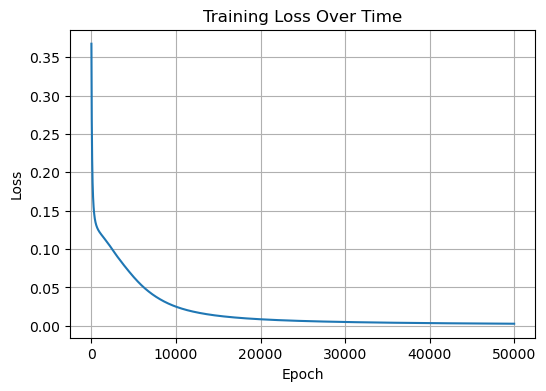

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(train_loss)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

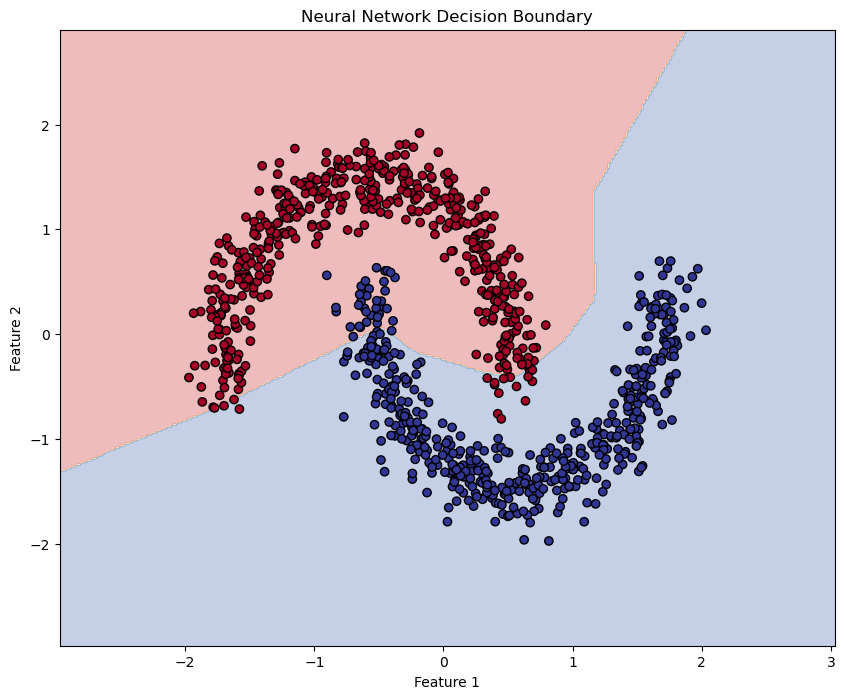

In [22]:
# Create a function to plot decision boundary
def plot_decision_boundary(X, y, model):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions for each point in the mesh
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.T.argmax(axis=1)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.argmax(axis=1), 
                cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, nn)
    

In [24]:
# Evaluate the model
test_predictions = nn.forward(X_test)
test_loss = nn.calculate_loss(y_test, test_predictions)
test_accuracy = np.mean(np.argmax(test_predictions.T, axis=1) == 
                       np.argmax(y_test, axis=1))

print(f"\nTest Loss: {test_loss:.6f}")
print(f"Test Accuracy: {test_accuracy:.2%}")


Test Loss: 0.006869
Test Accuracy: 99.00%
